# Zadanie 1

Results for KNeighborsClassifier:
Accuracy: 0.9440
Recall (Sensitivity): 0.0196
Specificity: 0.9946
Confusion Matrix:
[[926   5]
 [ 50   1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       931
           1       0.17      0.02      0.04        51

    accuracy                           0.94       982
   macro avg       0.56      0.51      0.50       982
weighted avg       0.91      0.94      0.92       982

Results for LogisticRegression:
Accuracy: 0.9481
Recall (Sensitivity): 0.0000
Specificity: 1.0000
Confusion Matrix:
[[931   0]
 [ 51   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       931
           1       1.00      0.00      0.00        51

    accuracy                           0.95       982
   macro avg       0.97      0.50      0.49       982
weighted avg       0.95      0.95      0.92       982



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for KNeighborsClassifier (SMOTE):
Accuracy: 0.7943
Recall (Sensitivity): 0.4706
Specificity: 0.8120
Confusion Matrix:
[[756 175]
 [ 27  24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.81      0.88       931
           1       0.12      0.47      0.19        51

    accuracy                           0.79       982
   macro avg       0.54      0.64      0.54       982
weighted avg       0.92      0.79      0.85       982

Results for LogisticRegression (SMOTE):
Accuracy: 0.9450
Recall (Sensitivity): 0.0392
Specificity: 0.9946
Confusion Matrix:
[[926   5]
 [ 49   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       931
           1       0.29      0.04      0.07        51

    accuracy                           0.95       982
   macro avg       0.62      0.52      0.52       982
weighted avg       0.92      0.95      0.92       982

Resu

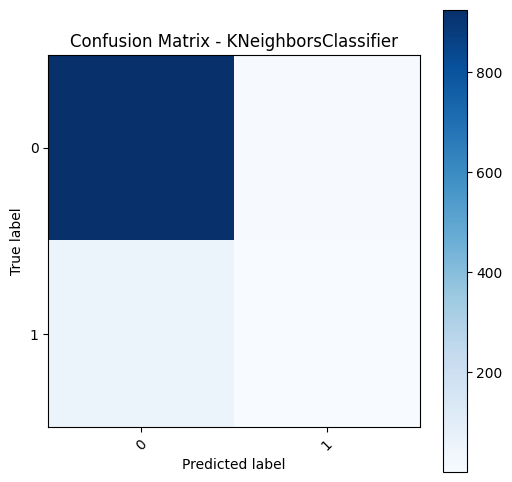

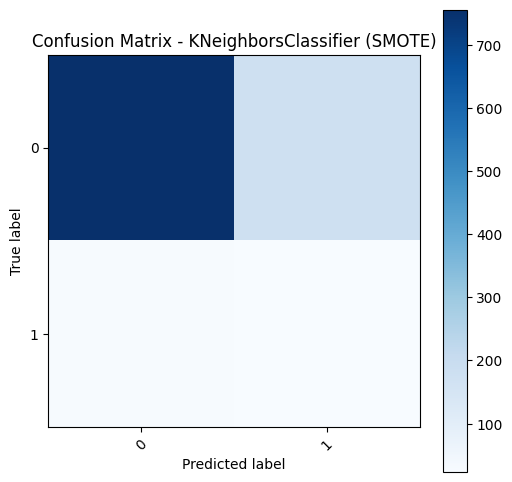

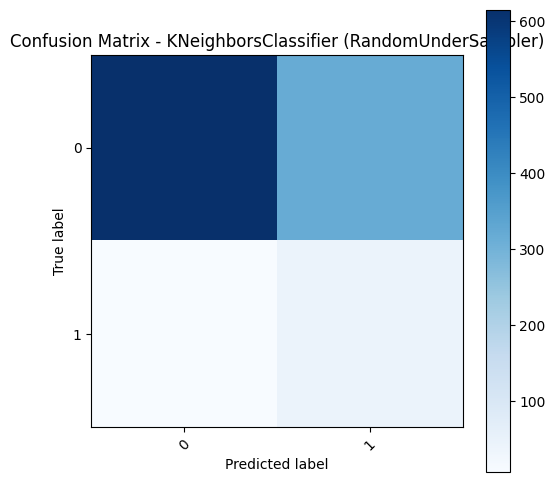

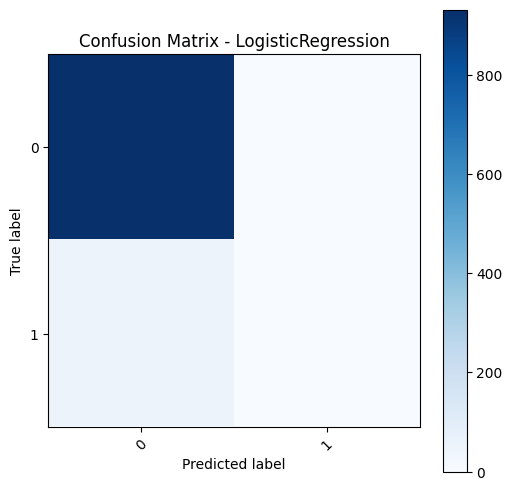

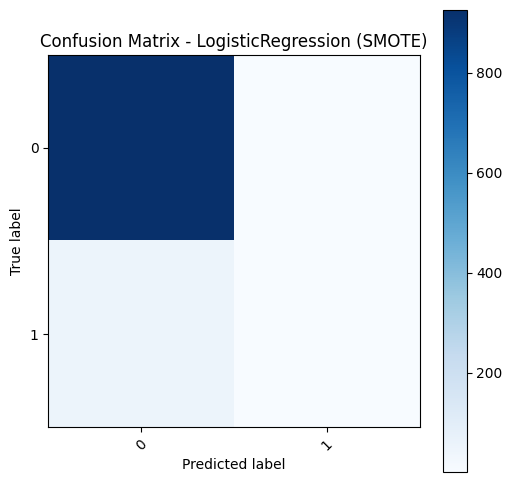

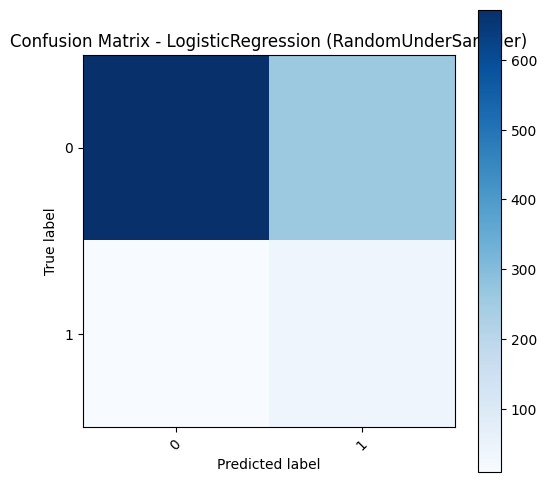

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score

# Wczytanie danych
data_csv = pd.read_csv('stroke.csv', sep=';')

# Usunięcie wierszy z brakującymi danymi w kolumnie bmi
data_csv = data_csv.dropna(subset=['bmi'])

# Zamiana Yes na 1 oraz No na 0 w kolumnie ever_married
data_csv['ever_married'] = data_csv['ever_married'].map({'Yes': 1, 'No': 0})

# Zastosowanie dummy encoding dla zmiennych kategorycznych
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']
data_csv = pd.get_dummies(data_csv, columns=categorical_columns)

# Podział na zbiór uczący i testowy
X = data_csv.drop(['stroke'], axis=1)
y = data_csv['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Analiza niezbalansowanego zbioru
class_counts = y_train.value_counts()
positive_class_ratio = class_counts[1] / class_counts.sum()
negative_class_ratio = class_counts[0] / class_counts.sum()

# Modelowanie
# a) Model KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# b) Model LogisticRegression
logreg = LogisticRegression(max_iter=1000)  # Zwiększenie liczby iteracji
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Ocena modeli
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    class_report = classification_report(y_true, y_pred, zero_division=1)  # Dodanie obsługi zero_division

    # Dodane wyliczenia dla czułości (Recall), specyficzności i dokładności
    recall = recall_score(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 1  # Zapobieżenie dzieleniu przez zero

    print(f"Results for {model_name}:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{class_report}")

# Wyniki dla KNeighborsClassifier
evaluate_model(y_test, y_pred_knn, "KNeighborsClassifier")

# Wyniki dla LogisticRegression
evaluate_model(y_test, y_pred_logreg, "LogisticRegression")

# c) Techniki resamplingu
# Oversampling (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Undersampling (RandomUnderSampler)
rus = RandomUnderSampler(random_state=42)
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)

# Modelowanie na danych z zastosowaniem resamplingu
knn_resampled = KNeighborsClassifier()
knn_resampled.fit(X_resampled, y_resampled)
y_pred_knn_resampled = knn_resampled.predict(X_test)

logreg_resampled = LogisticRegression(max_iter=1000)  # Zwiększenie liczby iteracji
logreg_resampled.fit(X_resampled, y_resampled)
y_pred_logreg_resampled = logreg_resampled.predict(X_test)

# Ocena modeli po resamplingu
evaluate_model(y_test, y_pred_knn_resampled, "KNeighborsClassifier (SMOTE)")
evaluate_model(y_test, y_pred_logreg_resampled, "LogisticRegression (SMOTE)")

# Wyniki dla undersamplingu
knn_resampled_under = KNeighborsClassifier()
knn_resampled_under.fit(X_resampled_under, y_resampled_under)
y_pred_knn_resampled_under = knn_resampled_under.predict(X_test)

logreg_resampled_under = LogisticRegression(max_iter=1000)  # Zwiększenie liczby iteracji
logreg_resampled_under.fit(X_resampled_under, y_resampled_under)
y_pred_logreg_resampled_under = logreg_resampled_under.predict(X_test)

# Ocena modeli po undersamplingu
evaluate_model(y_test, y_pred_knn_resampled_under, "KNeighborsClassifier (RandomUnderSampler)")
evaluate_model(y_test, y_pred_logreg_resampled_under, "LogisticRegression (RandomUnderSampler)")

# Wykresy
def plot_confusion_matrix(y_true, y_pred, title):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    classes = [0, 1]
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Wykresy dla KNeighborsClassifier
plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix - KNeighborsClassifier")
plot_confusion_matrix(y_test, y_pred_knn_resampled, "Confusion Matrix - KNeighborsClassifier (SMOTE)")
plot_confusion_matrix(y_test, y_pred_knn_resampled_under, "Confusion Matrix - KNeighborsClassifier (RandomUnderSampler)")

# Wykresy dla LogisticRegression
plot_confusion_matrix(y_test, y_pred_logreg, "Confusion Matrix - LogisticRegression")
plot_confusion_matrix(y_test, y_pred_logreg_resampled, "Confusion Matrix - LogisticRegression (SMOTE)")
plot_confusion_matrix(y_test, y_pred_logreg_resampled_under, "Confusion Matrix - LogisticRegression (RandomUnderSampler)")


# Zadanie 2

In [ ]:
count_0 = data_csv[data_csv['stroke'] == 0]['stroke'].count()
count_1 = data_csv[data_csv['stroke'] == 1]['stroke'].count()

print(f"Liczba wystąpień '0' w kolumnie 'stroke': {count_0}")
print(f"Liczba wystąpień '1' w kolumnie 'stroke': {count_1}")

Liczba wystąpień '0' w kolumnie 'stroke': 4699
Liczba wystąpień '1' w kolumnie 'stroke': 209


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


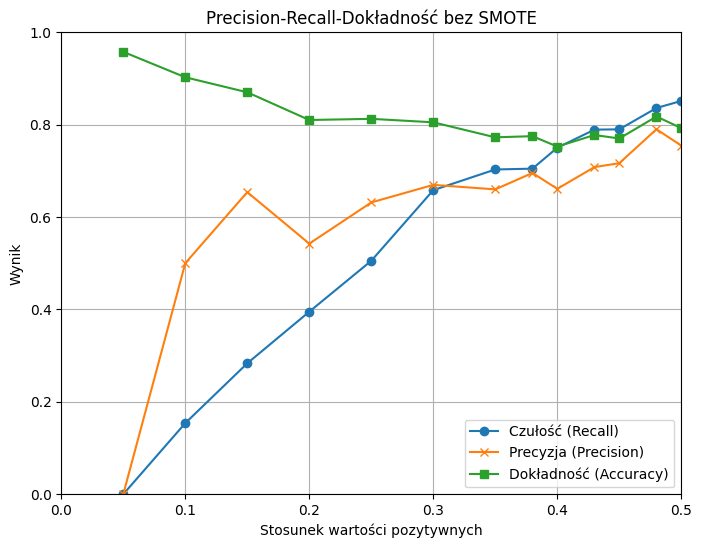

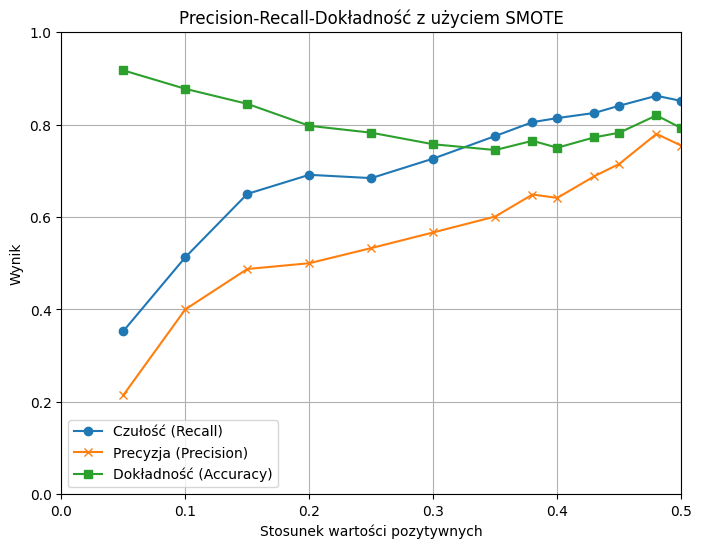

In [ ]:
# Procent zmiennych pozytywnych do przetestowania
positive_ratios = [0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.38, 0.40,  0.43,  0.45,  0.48, 0.50]

# Listy do przechowywania wyników precision, recall i accuracy
precision_no_smote = []
recall_no_smote = []
accuracy_no_smote = []

precision_with_smote = []
recall_with_smote = []
accuracy_with_smote = []

for ratio in positive_ratios:
    # Tworzenie niezrównoważonych danych
    positive_count = int(2000 * ratio)
    negative_count = 2000 - positive_count

    positive_samples = data_csv[data_csv['stroke'] == 1].sample(n=positive_count, replace=True, random_state=4)
    negative_samples = data_csv[data_csv['stroke'] == 0].sample(n=negative_count, replace=True, random_state=4)

    unbalanced_data = pd.concat([positive_samples, negative_samples])

    # Podział na zbiór uczący i testowy
    X_unbalanced = unbalanced_data.drop(['stroke'], axis=1)
    y_unbalanced = unbalanced_data['stroke']
    X_train_unbalanced, X_test_unbalanced, y_train_unbalanced, y_test_unbalanced = train_test_split(
        X_unbalanced, y_unbalanced, test_size=0.2, random_state=1
    )

    # Regresja logistyczna bez SMOTE
    logreg_unbalanced = LogisticRegression(max_iter=2000)
    logreg_unbalanced.fit(X_train_unbalanced, y_train_unbalanced)

    y_pred = logreg_unbalanced.predict(X_test_unbalanced)

    precision_no_smote.append(precision_score(y_test_unbalanced, y_pred))
    recall_no_smote.append(recall_score(y_test_unbalanced, y_pred))
    accuracy_no_smote.append(accuracy_score(y_test_unbalanced, y_pred))

    # Regresja logistyczna z SMOTE
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train_unbalanced, y_train_unbalanced)
    logreg_smote = LogisticRegression(max_iter=2000)
    logreg_smote.fit(X_resampled, y_resampled)

    y_pred_smote = logreg_smote.predict(X_test_unbalanced)

    precision_with_smote.append(precision_score(y_test_unbalanced, y_pred_smote))
    recall_with_smote.append(recall_score(y_test_unbalanced, y_pred_smote))
    accuracy_with_smote.append(accuracy_score(y_test_unbalanced, y_pred_smote))

# Wykres dla danych bez SMOTE
plt.figure(figsize=(8, 6))
plt.plot(positive_ratios, recall_no_smote, marker='o', label='Czułość (Recall)')
plt.plot(positive_ratios, precision_no_smote, marker='x', label='Precyzja (Precision)')
plt.plot(positive_ratios, accuracy_no_smote, marker='s', label='Dokładność (Accuracy)')

plt.xlabel('Stosunek wartości pozytywnych')
plt.ylabel('Wynik')
plt.title('Precision-Recall-Dokładność bez SMOTE')
plt.legend()
plt.grid(True)
plt.xlim([0.0, 0.5])
plt.ylim([0.0, 1.0])
plt.show()

# Wykres dla danych z SMOTE
plt.figure(figsize=(8, 6))
plt.plot(positive_ratios, recall_with_smote, marker='o', label='Czułość (Recall)')
plt.plot(positive_ratios, precision_with_smote, marker='x', label='Precyzja (Precision)')
plt.plot(positive_ratios, accuracy_with_smote, marker='s', label='Dokładność (Accuracy)')

plt.xlabel('Stosunek wartości pozytywnych')
plt.ylabel('Wynik')
plt.title('Precision-Recall-Dokładność z użyciem SMOTE')
plt.legend()
plt.grid(True)
plt.xlim([0.0, 0.5])
plt.ylim([0.0, 1.0])
plt.show()